In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from copy import deepcopy
import pickle

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
data = pd.read_csv('topic_en.csv',index_col=0)

# Changing the titles so that they work as hyperlinks in my flask app.

In [4]:
long_titles = deepcopy(list(data.index))

In [5]:
hyper_titles = []
for title in long_titles :
    title = title.split(';')
    title = ''.join(title)
    title = title.replace("'",'')
    title = title.replace(';','')
    title = title.replace(',','')
    title = title.replace('"','')
    title = title.replace('(','')
    title = title.replace(')','')
    title = title.replace(' ','_')
    hyper_titles.append(title)

In [6]:
pickle.dump(dict(sorted(list(zip(hyper_titles, long_titles)))),open('en_title_dictionary.pkl','wb'))

In [8]:
data.index = hyper_titles
data.to_csv('topic_en_hyper.csv')

Scaling my data for distance calculations.

In [9]:
scaler = StandardScaler()
d_s = scaler.fit_transform(data)

# K Means

In [10]:
inertias = []
sils = []
SSEs = []
for k in range(2,21) :
    km = KMeans(n_clusters=k,random_state=8)
    km.fit(d_s)
    labels = km.labels_
    inertias.append(km.inertia_)
    sils.append(silhouette_score(d_s, labels, metric='euclidean'))

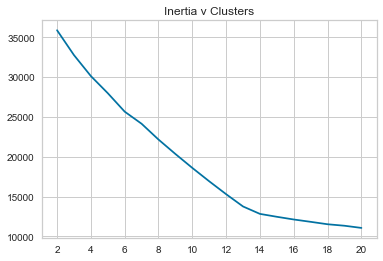

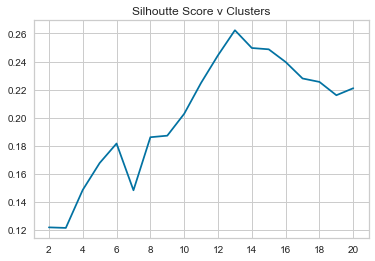

In [11]:
plt.plot(list(range(2,21)),inertias)
plt.title('Inertia v Clusters')
plt.xticks(ticks=list(range(2,21,2)))
plt.show()
plt.plot(list(range(2,21)),sils)
plt.title('Silhoutte Score v Clusters')
plt.xticks(ticks=list(range(2,21,2)))
plt.show()
# It looks like 12-14 is a good cluster range

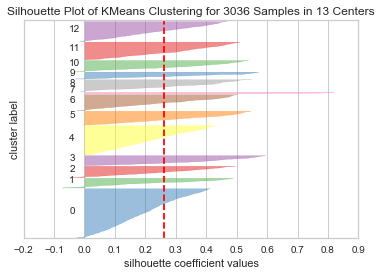

In [12]:
km = KMeans(n_clusters=13,random_state=8)
km.fit(d_s)
vis = SilhouetteVisualizer(km)
vis.fit(d_s)
vis.poof()

In [13]:
example1 = pd.DataFrame(zip(data.index,km.labels_))
example1.groupby(1).count()

,0
1,
0,715
1,143
2,165
3,145
4,428
5,201
6,232
7,26
8,172


In [145]:
# Hmmm... I don't know the books well but a lot of these clusters seem okay but not quite what I want
example1[example1[1]==2].head()

,0,1
5,Marching_on_Niagara_by_Edward_Stratemeyer,2
14,Queen_Shebas_Ring_by_Henry_Rider_Haggard,2
20,The_Refugees_by_Sir_Arthur_Conan_Doyle,2
26,Child_of_Storm_by_Henry_Rider_Haggard,2
31,Oak_Openings_by_James_Fenimore_Cooper,2


# HAC

In [84]:
# Coincidentally, 13 was best here as well
ac = AgglomerativeClustering(n_clusters=13,linkage='ward')
ac.fit(d_s)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=13,
                        pooling_func='deprecated')

In [85]:
example = pd.DataFrame(zip(data.index,ac.labels_))

In [86]:
example.groupby(1).count() #1 is column representing cluster assignment

,0
1,
0,726
1,249
2,153
3,211
4,199
5,243
6,174
7,165
8,230


In [102]:
# pretty good topics, including the infamous boats
example[example[1]==10] #BOATS

,0,1
6,Keeping_Watch_Night_Watches_Part_2_by_William_...,10
120,Short_Cruises_by_William_Wymark_Jacobs,10
130,Manners_Makyth_Man_Ships_Company_Part_12_by_Wi...,10
257,Skilled_Assistance_Ships_Company_Part_9_by_Wil...,10
275,Sea_Urchins_by_William_Wymark_Jacobs,10
414,Night_Watches_by_William_Wymark_Jacobs,10
437,Sentence_Deferred_Sailors_Knots_Part_4_by_Will...,10
705,The_Skipper’s_Wooing_and_The_Brown_Man’s_Serva...,10
750,Captains_All_by_William_Wymark_Jacobs,10
879,Light_Freights_by_William_Wymark_Jacobs,10


### DBSCAN
Doesn't really work, my data either globs a lot or is all called noise.

In [52]:
db = DBSCAN(eps=1, min_samples=9)

In [53]:
db.fit(d_s)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=9, n_jobs=None, p=None)

In [54]:
core = db.core_sample_indices_.tolist()

In [55]:
ex = pd.DataFrame(zip(data.index,db.labels_))

In [56]:
ex.groupby(1).count()

,0
1,
-1,1919
0,86
1,810
2,71
3,27
4,19
5,38
6,10
7,15


In [73]:
# These books are too dissimilar
ex[ex[1]==1]

,0,1
1,The_Editors_Relations_With_The_Young_Contribut...,1
8,Sense_and_Sensibility_by_Jane_Austen,1
11,Illustrations_of_The_Book_of_Job_by_William_Blake,1
13,Liza_of_Lambeth_by_William_Somerset_Maugham,1
16,Amy_Foster_by_Joseph_Conrad,1
22,The_Love_of_Ulrich_Nebendahl_by_Jerome_Klapka_...,1
24,A_Woman_of_No_Importance_by_Oscar_Wilde,1
27,Pride_and_Prejudice_by_Jane_Austen,1
36,Fancys_Show-Box_From_Twice_Told_Tales_by_Natha...,1
42,Flower_Fables_by_Louisa_May_Alcott,1


### PCA visual of separability

Text(0, 0.5, 'PCA Axis 2')

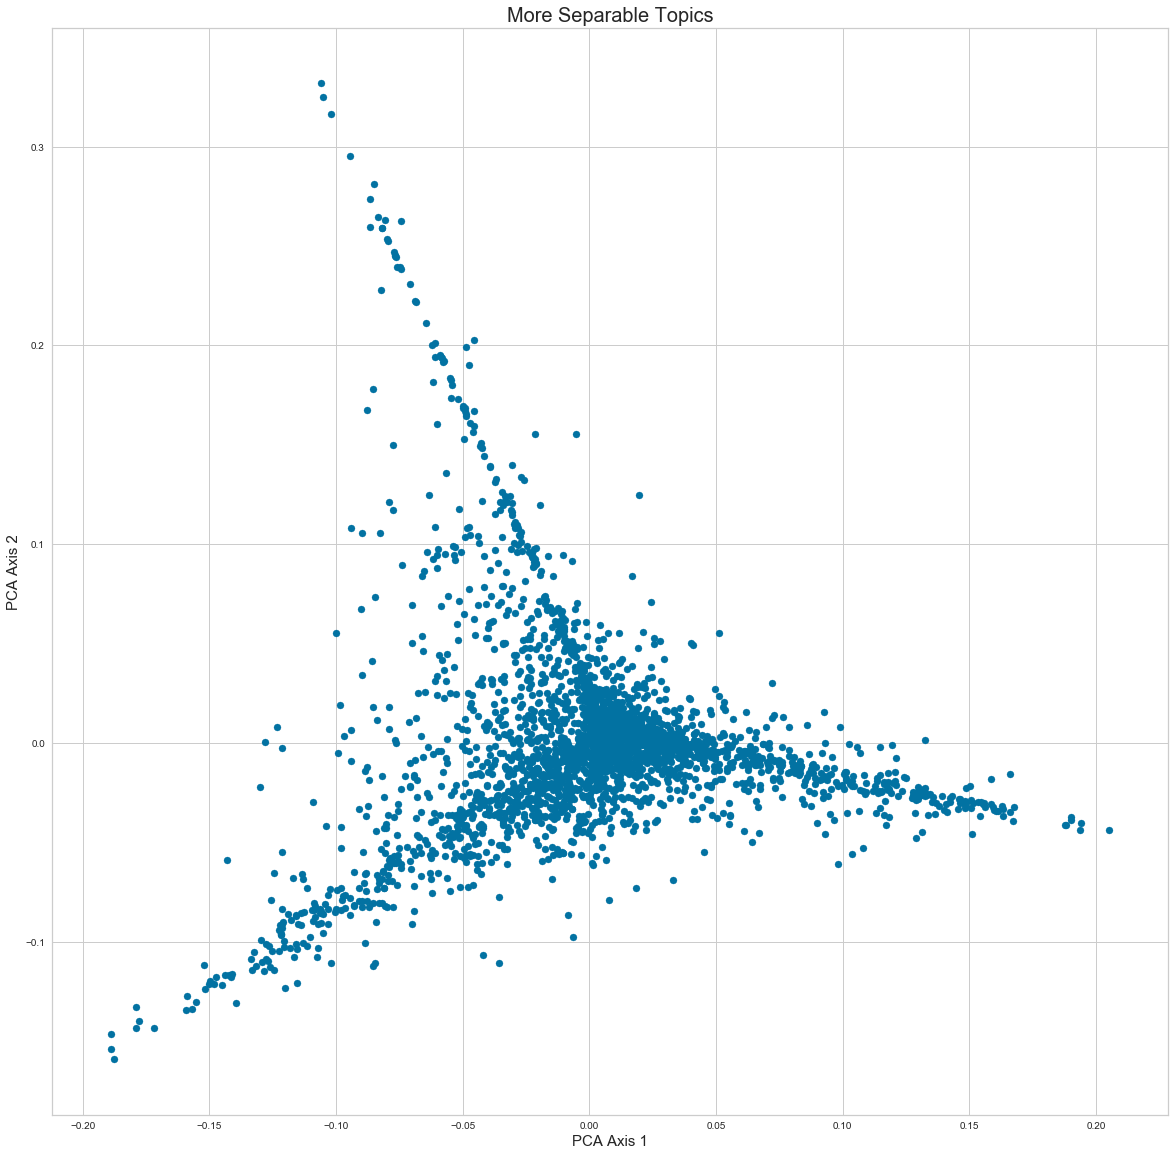

In [100]:
pca = PCA(n_components=2,random_state=8)
pca.fit(data)
pca_data = pd.DataFrame(pca.transform(data))
plt.figure(figsize=(20,20))
plt.scatter(pca_data[0],pca_data[1])
plt.title("More Separable Topics",fontdict={'fontsize':20})
plt.xlabel("PCA Axis 1",fontdict={'fontsize':15})
plt.ylabel("PCA Axis 2",fontdict={'fontsize':15})

In [98]:
pca = PCA(n_components=3,random_state=8)
pca.fit(data)
pca_data = pd.DataFrame(pca.transform(data))

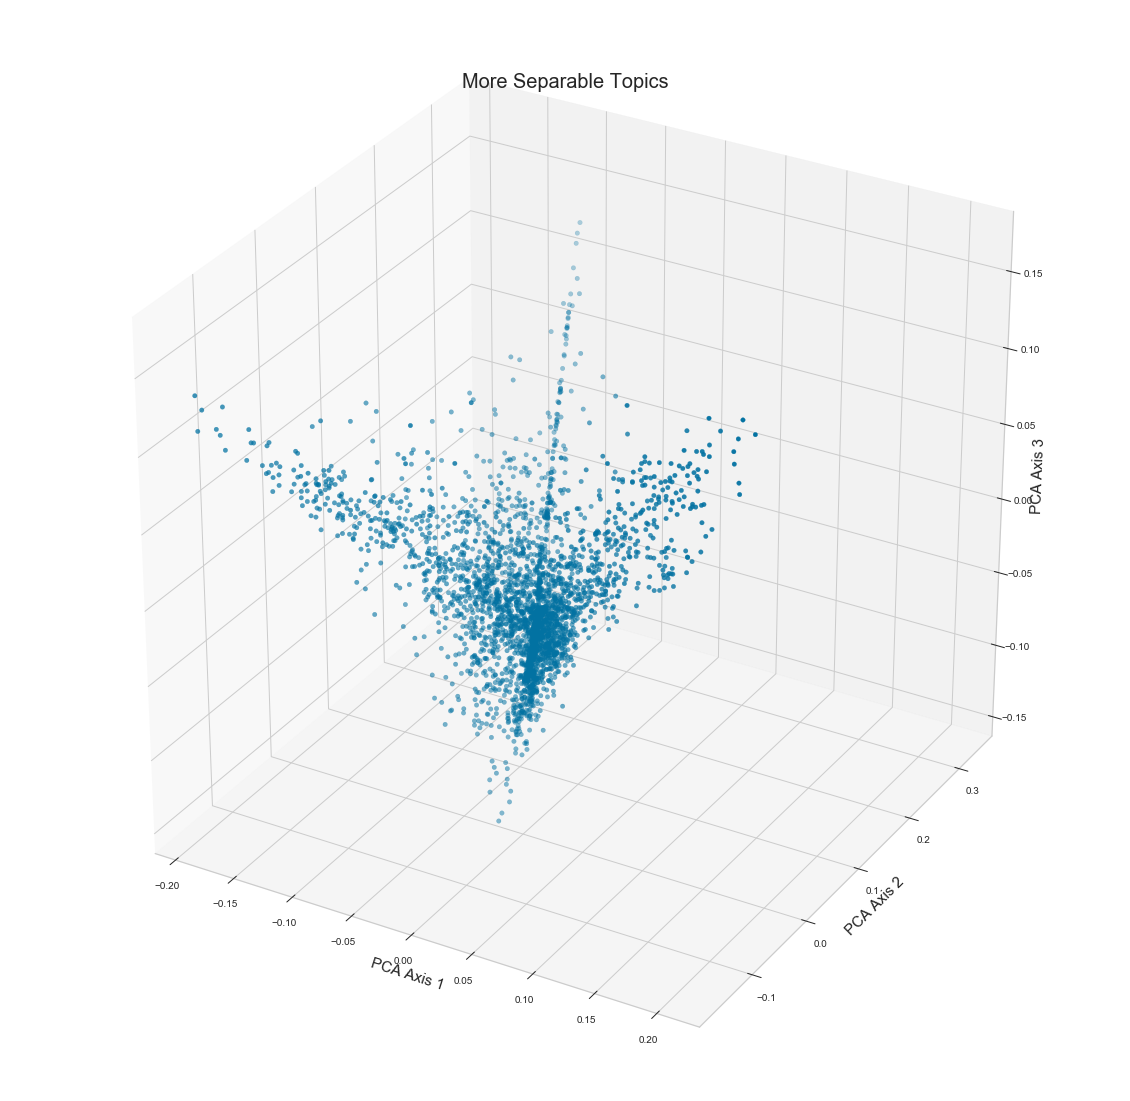

In [99]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[0],pca_data[1],pca_data[2])
plt.title("More Separable Topics",fontdict={'fontsize':20})
plt.xlabel("PCA Axis 1",fontdict={'fontsize':15})
plt.ylabel("PCA Axis 2",fontdict={'fontsize':15})
ax.set_zlabel("PCA Axis 3",fontdict={'fontsize':15})
plt.show()

### TSNE visual of clusters

In [104]:
from sklearn.manifold import TSNE

In [105]:
model = TSNE(n_components=2,random_state=8,verbose=2)

In [147]:
tsne_data = model.fit_transform(data)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3036 samples in 0.002s...
[t-SNE] Computed neighbors for 3036 samples in 0.248s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3036
[t-SNE] Computed conditional probabilities for sample 2000 / 3036
[t-SNE] Computed conditional probabilities for sample 3000 / 3036
[t-SNE] Computed conditional probabilities for sample 3036 / 3036
[t-SNE] Mean sigma: 0.023105
[t-SNE] Computed conditional probabilities in 0.135s
[t-SNE] Iteration 50: error = 82.1857834, gradient norm = 0.0507978 (50 iterations in 1.321s)
[t-SNE] Iteration 100: error = 75.7893600, gradient norm = 0.0069321 (50 iterations in 1.055s)
[t-SNE] Iteration 150: error = 75.3177567, gradient norm = 0.0070359 (50 iterations in 0.982s)
[t-SNE] Iteration 200: error = 75.1262512, gradient norm = 0.0014524 (50 iterations in 0.936s)
[t-SNE] Iteration 250: error = 75.1143494, gradient norm = 0.0005101 (50 iterations in 0.970s)
[t-SNE] KL divergence after 250 iterati

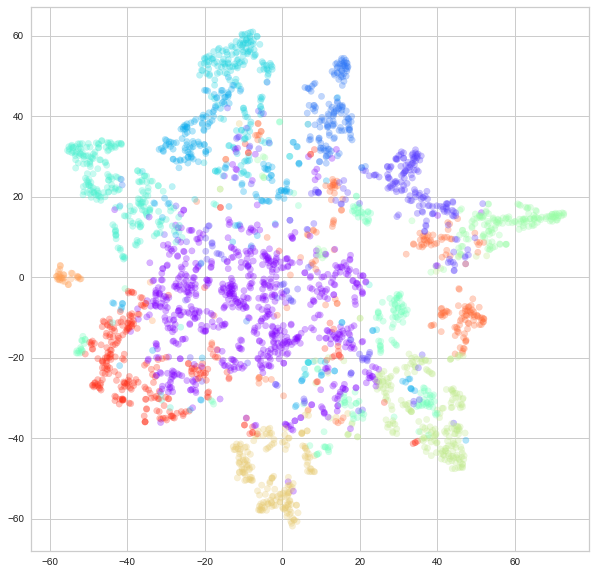

In [144]:
clust = ac.labels_

colorize = []
for i in range(len(data)):
    colorize.append(plt.cm.rainbow(clust[i]*20))
x,y = zip(*tsne_data)
plt.figure(figsize= (10,10))
plt.scatter(x,y,c=colorize,s=40, alpha=.3)